In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
import shap
from sklearn.model_selection import GridSearchCV

In [107]:
df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\Do_an_cuoiky\\datasets\\Heart_Attack\\Heart Attack.csv')
# df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\decision_tree\\heart_disease\\heart\\heart.csv')
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [108]:
df.shape

(1319, 9)

- chuyển đổi các thành phần trong lớp class thành số

In [109]:
from sklearn.preprocessing import LabelEncoder
ecd = LabelEncoder()
df['class'] = ecd.fit_transform(df['class'])
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


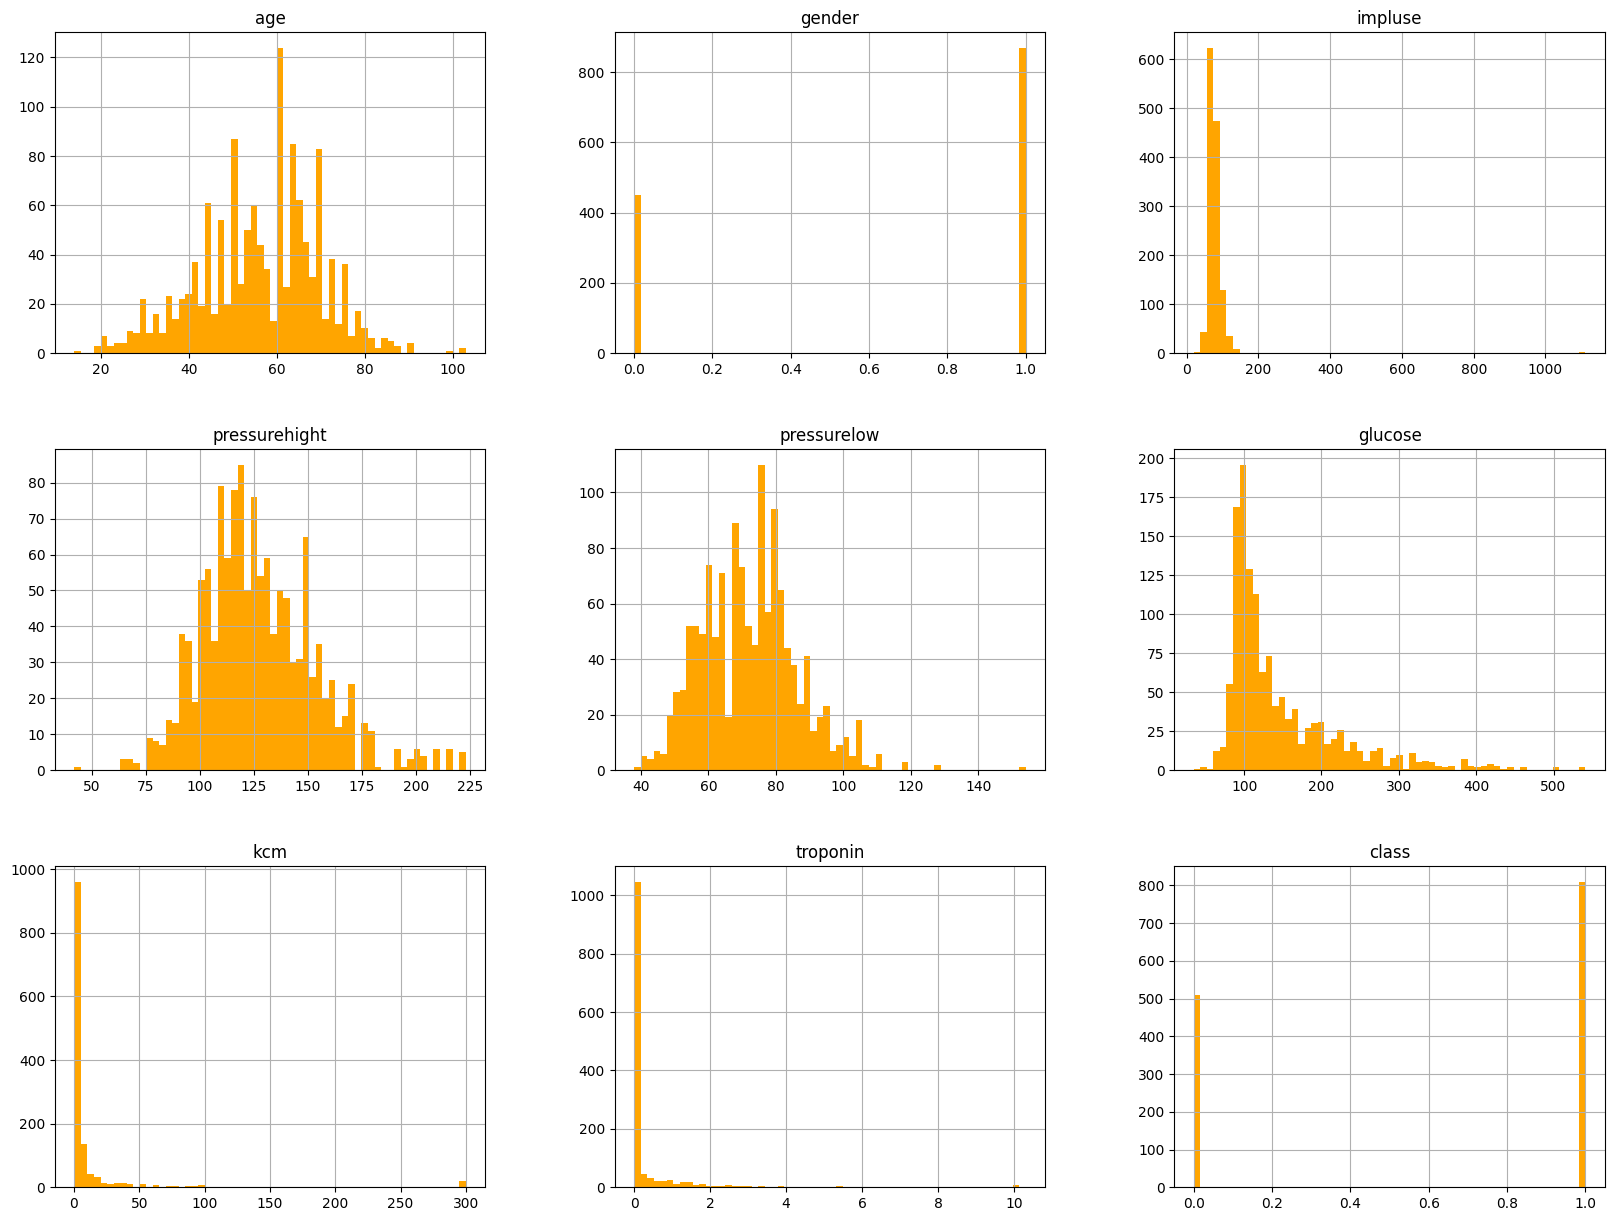

In [110]:
df.hist(bins=60, figsize=(20,15), color='orange')

plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



,class,count
0,1,810
1,0,509


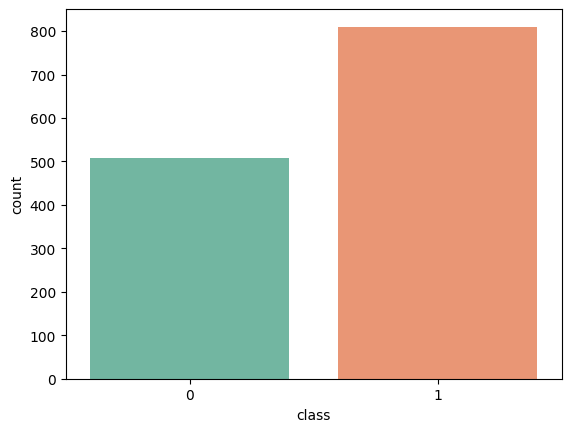

In [111]:
sns.countplot(data=df,x='class',palette='Set2')
df['class'].value_counts().reset_index(name='count')

In [128]:
feature_names = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
X = df.drop(columns= ['class'], axis=1).values
y = df['class'].values

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Sử dụng RandomOverSampler để cân bằng dữ liệu ở lớp class

In [231]:
from imblearn.over_sampling import RandomOverSampler
X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)

- Standardization

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
X.shape

(1319, 8)

- PCA

In [117]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = None)
# X = pca.fit_transform(X)
# X.shape

In [133]:
sum(y_train == 0)

408

In [134]:
sum(y_train == 1)


647

## SVM

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [284]:
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')


In [285]:
from sklearn import svm
svm = svm.SVC(kernel='linear', C = 100)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [286]:
# Kết quả
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred))
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("recall_score: ", metrics.recall_score(y_test, y_pred))
print("precision_score: ", metrics.precision_score(y_test, y_pred))

confusion_matrix: 
 [[ 95   6]
 [ 20 143]]
accuracy_score:  0.9015151515151515
f1_score:  0.9166666666666666
recall_score:  0.8773006134969326
precision_score:  0.959731543624161


In [288]:
y_train_pred_svm = svm.predict(X_train)
print("accuracy_score_on_training_set: ", metrics.accuracy_score(y_train, y_train_pred_svm))

accuracy_score_on_training_set:  0.9258114374034003


## MLP

In [18]:
# Khai báo thư viện
from sklearn.neural_network import MLPClassifier

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [245]:
# Thiết lập lưới tìm kiếm
param_grid_mlp = {'hidden_layer_sizes': [(10,10,10), (50,100,50), (10,10), (10, )],
                  'alpha': [0.001, 0.01, 0.1]}

# Tạo mô hình MLP
mlp = MLPClassifier(max_iter=500)

# Tìm kiếm trên lưới
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# In kết quả
print("Best parameters for MLP:", grid_search_mlp.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_mlp = grid_search_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy on test set:", accuracy_mlp)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Best parameters for MLP: {'alpha': 0.001, 'hidden_layer_sizes': (10, 10, 10)}
Accuracy on test set: 0.8901515151515151


Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


In [280]:
#Train 
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), alpha=0.001, max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


In [281]:
#Kết quả
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_mlp))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_mlp))
print("f1_score: ", metrics.f1_score(y_test, y_pred_mlp))
print("recall_score: ", metrics.recall_score(y_test, y_pred_mlp))
print("precision_score: ", metrics.precision_score(y_test, y_pred_mlp))


confusion_matrix: 
 [[ 86  15]
 [ 17 146]]
accuracy_score:  0.8787878787878788
f1_score:  0.9012345679012346
recall_score:  0.8957055214723927
precision_score:  0.906832298136646


In [282]:
y_train_pred_mlp = mlp.predict(X_train)
print("accuracy_score: ", metrics.accuracy_score(y_train, y_train_pred_mlp))

accuracy_score:  0.9350850077279753


## Logistic_regression

In [227]:
# Khai báo thư viện
from sklearn.linear_model import LogisticRegression

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [23]:
# Thiết lập lưới tìm kiếm
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Tạo mô hình Logistic Regression
logistic_regression = LogisticRegression()

# Tìm kiếm trên lưới
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# In kết quả
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy on test set:", accuracy_lr)

Best parameters for Logistic Regression: {'C': 100}
Accuracy on test set: 0.8863636363636364


In [236]:
# Train
lgr = LogisticRegression(C = 100).fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)

In [237]:
# Kết quả
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_lgr))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_lgr))
print("f1_score: ", metrics.f1_score(y_test, y_pred_lgr))
print("recall_score: ", metrics.recall_score(y_test, y_pred_lgr))
print("precision_score: ", metrics.precision_score(y_test, y_pred_lgr))

confusion_matrix: 
 [[ 92   9]
 [ 23 140]]
accuracy_score:  0.8787878787878788
f1_score:  0.8974358974358976
recall_score:  0.8588957055214724
precision_score:  0.9395973154362416


In [241]:
y_train_pred_lgr = lgr.predict(X_train)
print("accuracy_score: ", metrics.accuracy_score(y_train, y_train_pred_lgr))

accuracy_score:  0.9088098918083463


## Decision Tree

In [232]:
# Khai báo thư viện
from sklearn.tree import DecisionTreeClassifier

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [219]:
# Thiết lập lưới tìm kiếm
param_grid_dt = {'max_depth': [2, 3, 4, 5, None],
                 'min_samples_split': [2, 3, 4, 5],
                 'min_samples_leaf': [1, 2, 3, 4],
                 'ccp_alpha': [0.01, 0.1, 0.2, 0.3],
                 'criterion': ['entropy', 'gini']}

# Tạo mô hình Decision Tree
dt = DecisionTreeClassifier()

# Tìm kiếm trên lưới
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# In kết quả
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_dt_test = grid_search_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt_test)
print("Accuracy on test set:", accuracy_dt)

Best parameters for Decision Tree: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on test set: 0.9810606060606061


In [321]:
# Train
dt = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=3, criterion='entropy').fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [323]:
# Kết quả
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_dt))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_dt))
print("f1_score: ", metrics.f1_score(y_test, y_pred_dt))
print("recall_score: ", metrics.recall_score(y_test, y_pred_dt))
print("precision_score: ", metrics.precision_score(y_test, y_pred_dt))


confusion_matrix: 
 [[ 99   2]
 [  3 160]]
accuracy_score:  0.9810606060606061
f1_score:  0.9846153846153846
recall_score:  0.9815950920245399
precision_score:  0.9876543209876543


In [324]:
y_train_pred_dt = dt.predict(X_train)
print("confusion_matrix: \n", metrics.confusion_matrix(y_train, y_train_pred_dt))
print("accuracy_score: ", metrics.accuracy_score(y_train, y_train_pred_dt))
print("f1_score: ", metrics.f1_score(y_train, y_train_pred_dt))
print("recall_score: ", metrics.recall_score(y_train, y_train_pred_dt))
print("precision_score: ", metrics.precision_score(y_train, y_train_pred_dt))

confusion_matrix: 
 [[644   3]
 [ 10 637]]
accuracy_score:  0.9899536321483772
f1_score:  0.9898989898989901
recall_score:  0.9845440494590417
precision_score:  0.9953125


# Dùng shap train model tốt nhất

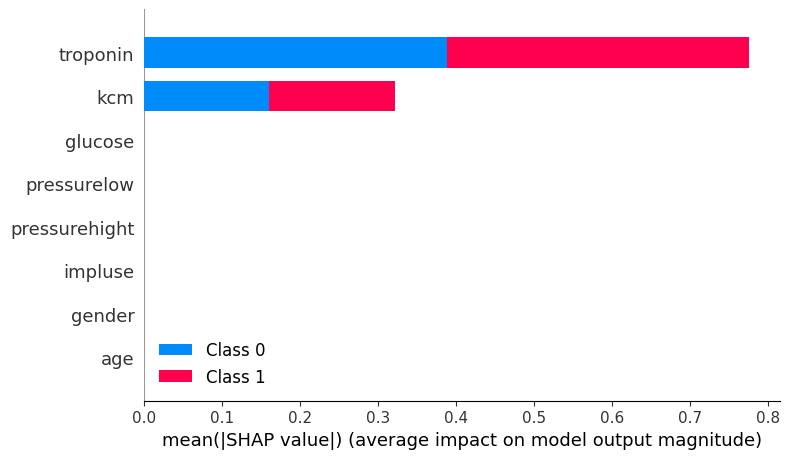

In [289]:
# Use the KernelExplainer for SVM
explainer = shap.Explainer(dt)
shap_values = explainer.shap_values(X_train)

# Plot the summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)

In [290]:
# Loại bỏ những feature không quan trọng
X_dt = df.drop(columns= ['class', 'impluse', 'age', 'pressurelow', 'glucose']).values

In [291]:

# Chia dữ liệu để train, test
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y, test_size=0.2, random_state=42)

In [45]:
# Thiết lập lưới tìm kiếm
param_grid_dt = {'max_depth': [3, 4, 5, 6, 7, None],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'ccp_alpha': [0.001, 0.01, 0.1, 1.0],
                 'criterion': ['entropy', 'gini']}

# Tạo mô hình Decision Tree
dt = DecisionTreeClassifier()

# Tìm kiếm trên lưới
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# In kết quả
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_dt = grid_search_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy on test set:", accuracy_dt)

Best parameters for Decision Tree: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on test set: 0.9772727272727273


In [292]:
# Train
dt_shap = DecisionTreeClassifier(ccp_alpha=0.001, max_depth = 4, min_samples_leaf=1, min_samples_split=2, criterion='entropy').fit(X_dt_train, y_dt_train)
y_pred_dt_shap = dt_shap.predict(X_dt_test)

In [293]:
# Kết quả
print("confusion_matrix: \n", metrics.confusion_matrix(y_dt_test, y_pred_dt_shap))
print("accuracy_score: ", metrics.accuracy_score(y_dt_test, y_pred_dt_shap))
print("f1_score: ", metrics.f1_score(y_dt_test, y_pred_dt_shap))
print("recall_score: ", metrics.recall_score(y_dt_test, y_pred_dt_shap))
print("precision_score: ", metrics.precision_score(y_dt_test, y_pred_dt_shap))


confusion_matrix: 
 [[ 98   3]
 [  2 161]]
accuracy_score:  0.9810606060606061
f1_score:  0.9847094801223242
recall_score:  0.9877300613496932
precision_score:  0.9817073170731707
